Exploratory Data Analysis on Student Performance Dataset

1️⃣ Import Libraries and Load Dataset

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
df = pd.read_csv("StudentsPerformance.csv")

# Display first few rows
df.head()


,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


2️⃣ Basic Dataset Information

In [2]:
df.info()
df.describe(include='all')
df.shape
df.columns


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race/ethnicity               1000 non-null   object
 2   parental level of education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test preparation course      1000 non-null   object
 5   math score                   1000 non-null   int64 
 6   reading score                1000 non-null   int64 
 7   writing score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


Index(['gender', 'race/ethnicity', 'parental level of education', 'lunch',
       'test preparation course', 'math score', 'reading score',
       'writing score'],
      dtype='object')

3️⃣ Check for Missing and Duplicate Values

In [3]:
df.isnull().sum()
df.duplicated().sum()


np.int64(0)

4️⃣ Data Cleaning

In [4]:
df = df.drop_duplicates()


5️⃣ Univariate Analysis (Categorical)

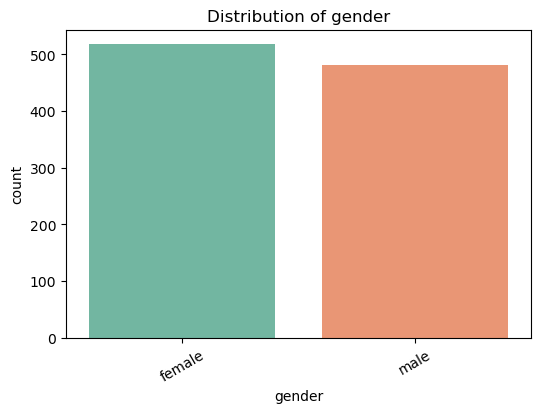

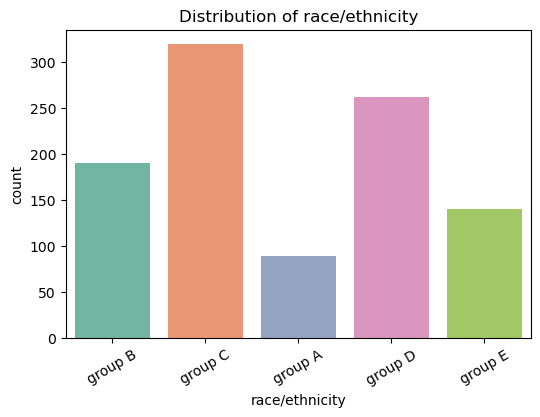

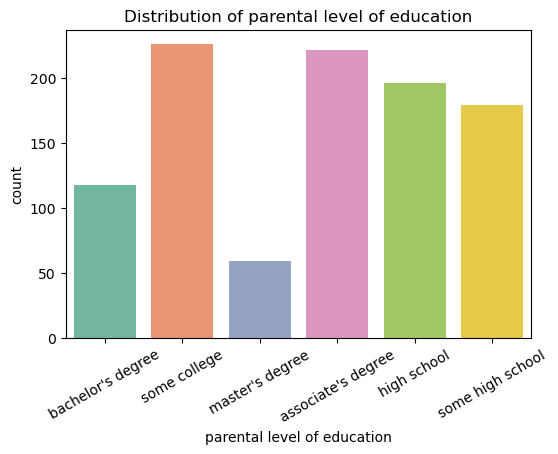

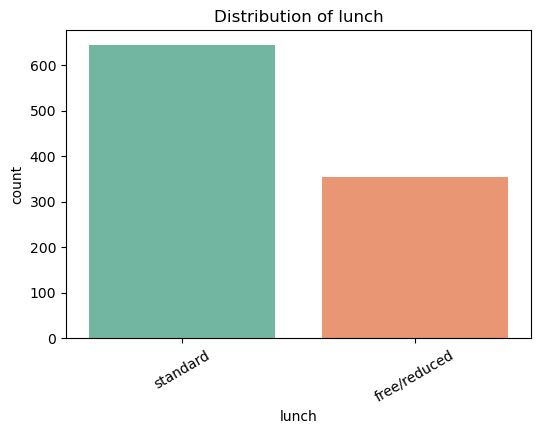

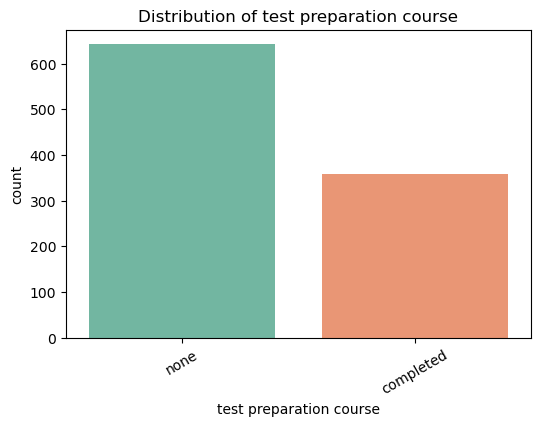

In [6]:
cat_cols = df.select_dtypes(include='object').columns
for col in cat_cols:
    plt.figure(figsize=(6,4))
    sns.countplot(x=col, data=df,hue=col, palette='Set2',legend=False)
    plt.title(f"Distribution of {col}")
    plt.xticks(rotation=30)
    plt.show()



6️⃣ Univariate Analysis (Numerical)

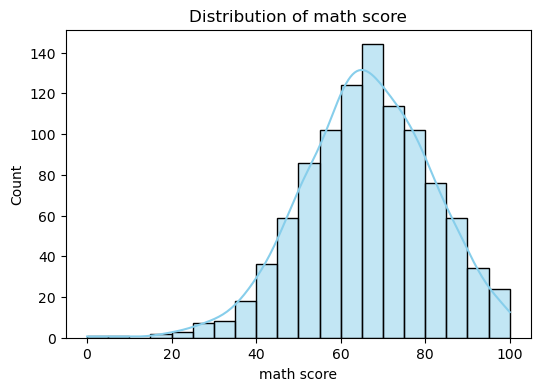

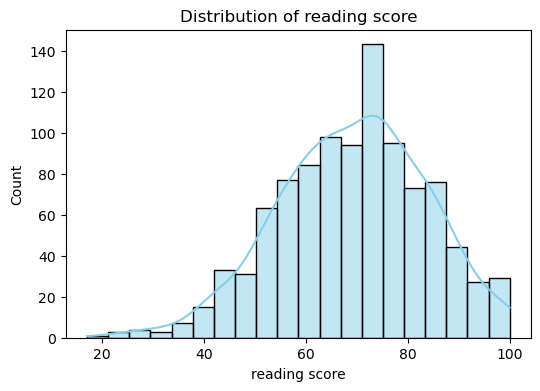

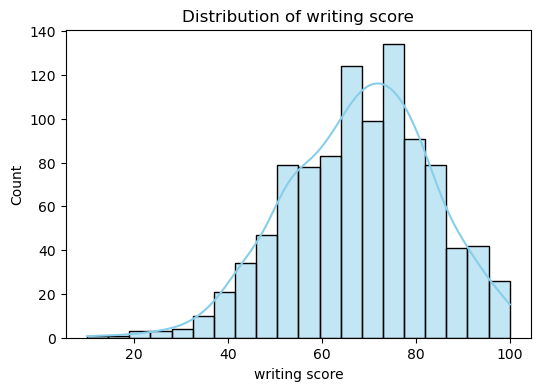

In [7]:
num_cols = df.select_dtypes(include=np.number).columns
for col in num_cols:
    plt.figure(figsize=(6,4))
    sns.histplot(df[col], kde=True, bins=20, color='skyblue')
    plt.title(f"Distribution of {col}")
    plt.show()
    


7️⃣ Bivariate Analysis

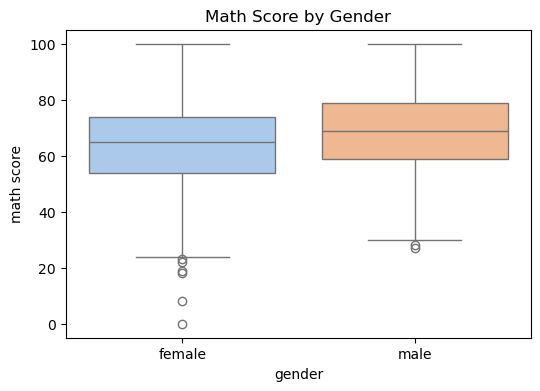

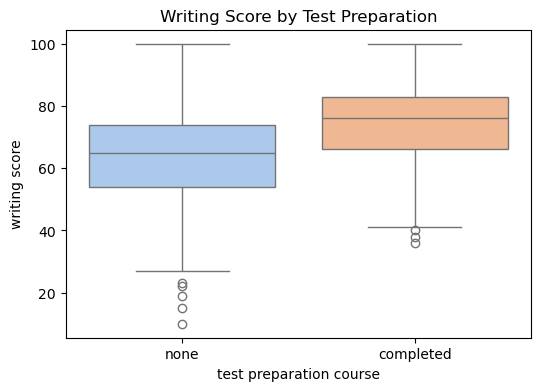

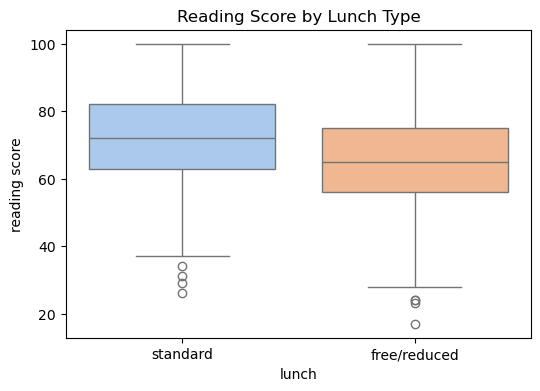

In [9]:
plt.figure(figsize=(6,4))
sns.boxplot(x='gender', y='math score', data=df, hue='gender', palette='pastel', legend=False)
plt.title("Math Score by Gender")
plt.show()

plt.figure(figsize=(6,4))
sns.boxplot(x='test preparation course', y='writing score', data=df,
            hue='test preparation course', palette='pastel', legend=False)
plt.title("Writing Score by Test Preparation")
plt.show()

plt.figure(figsize=(6,4))
sns.boxplot(x='lunch', y='reading score', data=df, hue='lunch', palette='pastel', legend=False)
plt.title("Reading Score by Lunch Type")
plt.show()



8️⃣ Correlation and Heatmap

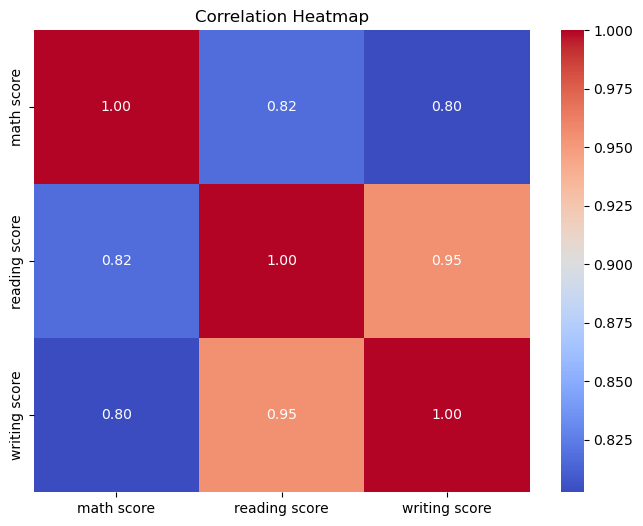

In [10]:
plt.figure(figsize=(8,6))
corr = df.corr(numeric_only=True)
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()


Save the cleaned dataset

In [11]:
# Save the cleaned dataset to a new CSV file
df.to_csv("student_performance_cleaned.csv", index=False)

print("✅ Cleaned dataset saved successfully as 'student_performance_cleaned.csv'")


✅ Cleaned dataset saved successfully as 'student_performance_cleaned.csv'
